In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm

In [2]:
file = pd.read_excel('MasterData_Wilson.xlsx')

In [3]:
file.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Unnamed: 29,Unnamed: 30
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,2.25,1,0,2.25,0,2.25,0.05,2.3,NaN,NaN
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,2,2,0,4,0,4,0.09,4.09,NaN,NaN
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.75,1,0,3.75,0,3.75,0.38,4.13,NaN,NaN
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.8,1,0,3.8,0,3.8,0.09,3.89,NaN,NaN
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,3.5,1,0,3.5,0,3.5,0.08,3.58,NaN,NaN


In [4]:
#date and time already in a datetime format 
file.dtypes

date             datetime64[ns]
time                     object
year                    float64
MonthN                  float64
Month                    object
WeekN                   float64
Day                     float64
WeekD                    object
H                       float64
Min                     float64
30min                   float64
Rtime                    object
30time                   object
H.5                     float64
Operation                object
Line Item                object
Department               object
Category                 object
Supplier                 object
Supplier Code            object
Cost                     object
Price                    object
Quantity                 object
Modifiers                object
Subtotal                 object
Discounts                object
Net Total                object
Tax                      object
Total Due                object
Unnamed: 29              object
Unnamed: 30             float64
dtype: o

In [5]:
file['Total Due'] = pd.to_numeric(file['Total Due'], errors='coerce')
#del file['Unnamed: 29']
#del file['Unnamed: 30']
file.columns

Index(['date', 'time', 'year', 'MonthN', 'Month', 'WeekN', 'Day', 'WeekD', 'H',
       'Min', '30min', 'Rtime', '30time', 'H.5', 'Operation', 'Line Item',
       'Department', 'Category', 'Supplier', 'Supplier Code', 'Cost', 'Price',
       'Quantity', 'Modifiers', 'Subtotal', 'Discounts', 'Net Total', 'Tax',
       'Total Due', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

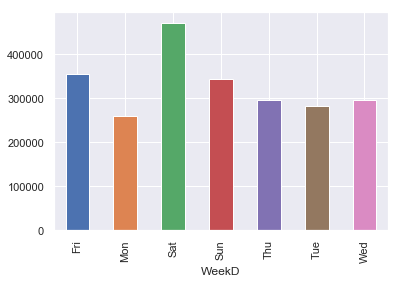

In [6]:
#groupby day total sum
day_group = file.groupby('WeekD')['Total Due'].sum()
day_group

Sum_perday = day_group.plot(kind='bar')

Sum_perday

In [7]:
date_group = file.groupby(['date'])['Total Due'].sum().to_frame(name = 'count').reset_index()
file1 = file.merge(date_group)
file1.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Unnamed: 29,Unnamed: 30,count
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,1,0,2.25,0,2.25,0.05,2.30,NaN,NaN,831.5
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,2,0,4,0,4,0.09,4.09,NaN,NaN,831.5
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,1,0,3.75,0,3.75,0.38,4.13,NaN,NaN,831.5
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,1,0,3.8,0,3.8,0.09,3.89,NaN,NaN,831.5
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,1,0,3.5,0,3.5,0.08,3.58,NaN,NaN,831.5


(0, 13)

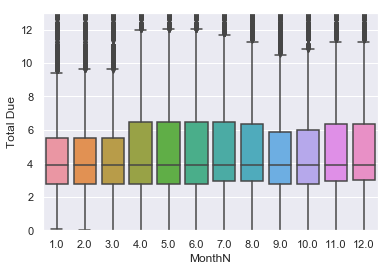

In [8]:
#Average amount spend/transaction per month
ax1 = sns.boxplot(x='MonthN',y='Total Due',data=file1)
ax1.set_ylim(0,13)

(0, 6000)

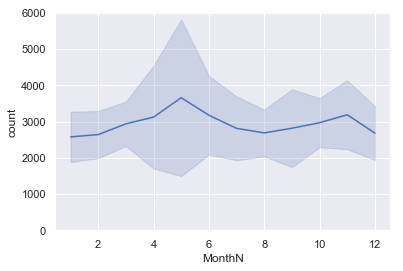

In [9]:
#Seasonal revenue
ax2 = sns.lineplot(x='MonthN',y='count',data=file1, ci='sd', estimator="mean")
ax2.set_ylim(0,6000)

(0, 6000)

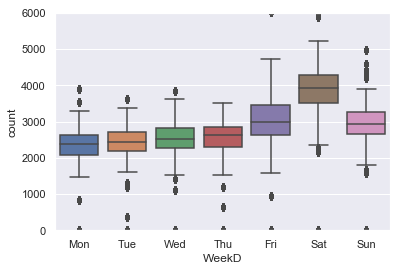

In [10]:
#Daily revenue
ax6 = sns.boxplot(x='WeekD',y='count',data=file1)
ax6.set_ylim(0,6000)
#ax2 = sns.lineplot(x='WeekD',y='count',data=file1, ci='sd', estimator="mean")

(array([736177., 736269., 736361., 736450., 736542., 736634., 736726.,
        736815., 736907., 736999.]), <a list of 10 Text xticklabel objects>)

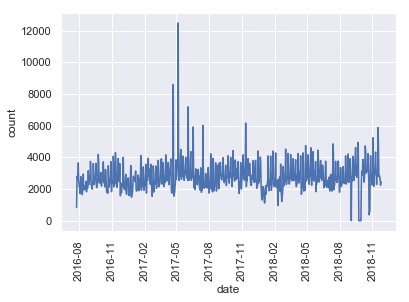

In [11]:
#Revenue over the period
ax3 = sns.lineplot(x='date',y='count',data=file1)
plt.xticks(rotation='vertical')

(0, 6000)

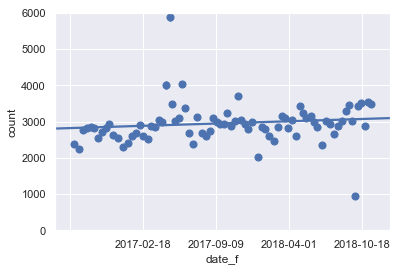

In [12]:
#Fitting regression line
file1 = file1.sort_values('date')
file1['date_f'] = pd.factorize(file1['date'])[0] + 1
mapping = dict(zip(file1['date_f'], file1['date'].dt.date))

ax = sns.regplot('date_f', 'count', data=file1,x_bins=80)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_ylim(0,6000)

(0, 20)

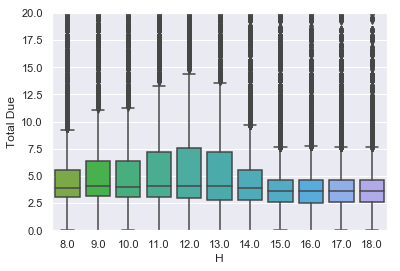

In [13]:
#By hours average spent
ax3 = sns.boxplot(x='H',y='Total Due',data=file1)
ax3.set_xlim(6.5,17.5)
ax3.set_ylim(0,20)

<bound method NDFrame.describe of 0               Pastry
117             Pastry
118         Croissants
119             Pastry
120       Dry Pastries
121            general
122            general
123        Cold Drinks
124         Croissants
125         Croissants
126         Croissants
127         Croissants
128         Croissants
129         Croissants
130            general
131            general
132              Bread
133       Dry Pastries
134             Pastry
135             Pastry
116             Coffee
136              Bread
115             Coffee
113            general
94          Croissants
95             general
96             general
97        Dry Pastries
98        Dry Pastries
99        Dry Pastries
              ...     
468565           Bread
468662          Pastry
468579          Coffee
468581          Pastry
468605        Hot Food
468604      Croissants
468603           Bread
468602        Hot Food
468601          Coffee
468600           Bread
468599           Bread


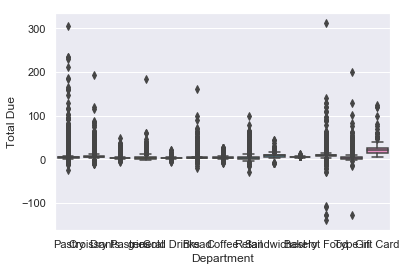

In [14]:
ax3 = sns.boxplot(x='Department',y='Total Due',data=file1)

file1['Department'].describe

In [15]:
department_group = file.groupby(['WeekD'])['Department'].nunique().to_frame(name = 'Department count').reset_index()
file1 = file.merge(department_group)
del file1['Unnamed: 29']
del file1['Unnamed: 30']
file1.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Department count
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,1,2.25,1,0,2.25,0,2.25,0.05,2.30,13
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,2,2,0,4,0,4,0.09,4.09,13
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,3.75,1,0,3.75,0,3.75,0.38,4.13,13
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,3.8,1,0,3.8,0,3.8,0.09,3.89,13
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,1.4,3.5,1,0,3.5,0,3.5,0.08,3.58,13


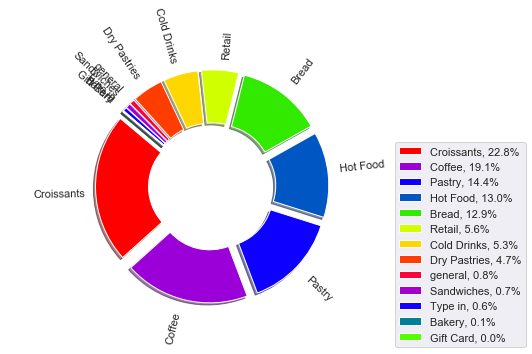

In [16]:
department_group = file.groupby('WeekD')['Department'].value_counts().to_frame(name = 'Department count').reset_index()
department_group

#Monday sells
Monday_sells = department_group[department_group['WeekD'] == 'Mon']
Monday_sells

# Data to plot
labels = Monday_sells['Department']
sizes = Monday_sells['Department count']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
total = sum(sizes)
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(labels)))

# Plot (Idea : nested pie chart)
plt.pie(sizes, explode = explode, colors=colors, labels=labels, wedgeprops=dict(width=0.5), shadow=True, startangle=140,rotatelabels=True,pctdistance=0.75)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.2, 0.8, 0.5),labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)])
plt.show()